In [3]:
#!pip install --user matplotlib==3.1.3
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
#from xlrd import *
import string
import unidecode
import re
from itertools import compress
from datetime import datetime

In [ ]:
from stargazer.stargazer import Stargazer

In [ ]:
import spacy
nlp = spacy.load('es_core_news_sm')

def lemmatizer(text):  
  doc = nlp(text)
  return ' '.join([word.lemma_ for word in doc])

In [12]:
import stanza

stanza.download('es')
stanza_tagger = stanza.Pipeline(lang='es', processors='tokenize,  pos, lemma')
parser = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma,depparse')

def pos_tagger(mytext):

  stanza_outcome = stanza_tagger(mytext)
  pos_text = [ word.text  for sent in stanza_outcome.sentences for word in sent.words]
  pos_upos = [ word.upos  for sent in stanza_outcome.sentences for word in sent.words]
  pos_xpos = [ word.xpos  for sent in stanza_outcome.sentences for word in sent.words]
  pos_lemma = [ word.lemma  for sent in stanza_outcome.sentences for word in sent.words]
  pos_feat = [ word.feats if word.feats else "_"  for sent in stanza_outcome.sentences for word in sent.words]
  dict_pos = {'word': pos_text, 'tag': pos_upos, 'lemma':pos_lemma, 'xpos': pos_xpos, 'feat':pos_feat} 
    
  df_pos = pd.DataFrame(dict_pos)
  return df_pos

def depen_parser(mytext):
   out_parser = parser(mytext)
   parser_id = [word.id for sent in out_parser.sentences for word in sent.words]
   parser_text = [word.text for sent in out_parser.sentences for word in sent.words]
   parser_head = [word.head for sent in out_parser.sentences for word in sent.words]
   parser_tag = [word.upos for sent in out_parser.sentences for word in sent.words] 
   parser_lemma = [word.lemma for sent in out_parser.sentences for word in sent.words] 
   parser_root = [sent.words[word.head-1].text if word.head > 0 else "root" for sent in out_parser.sentences for word in sent.words]
   parser_dep = [word.deprel  for sent in out_parser.sentences for word in sent.words]
   dict_pos = {'id':parser_id,'word': parser_text, 'head_id': parser_head, 'tag':parser_tag, 'lemma':parser_lemma, 'head': parser_root, 'dep':parser_dep} 
    
   df_parser = pd.DataFrame(dict_pos)
   return df_parser

2022-03-01 17:14:27 INFO: Downloading default packages for language: es (Spanish)...
2022-03-01 17:14:30 INFO: File exists: C:\Users\usuario\stanza_resources\es\default.zip.
2022-03-01 17:14:38 INFO: Finished downloading models and saved to C:\Users\usuario\stanza_resources.
2022-03-01 17:14:38 WARNING: Language es package default expects mwt, which has been added
2022-03-01 17:14:38 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |

2022-03-01 17:14:38 INFO: Use device: cpu
2022-03-01 17:14:38 INFO: Loading: tokenize
2022-03-01 17:14:38 INFO: Loading: mwt
2022-03-01 17:14:38 INFO: Loading: pos
2022-03-01 17:14:39 INFO: Loading: lemma
2022-03-01 17:14:39 INFO: Done loading processors!
2022-03-01 17:14:39 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt     

In [5]:
import os
from liwc import Liwc

orig_path = os.getcwd()

LIWC_FILEPATH = os.path.abspath(os.path.join(orig_path, 'LIWC2001_Spanish_O.dic'))
liwc = Liwc(LIWC_FILEPATH)

liwc.search('pueblos')  # ejemplo

### Aplicando LIWC a las 1000 conversaciones taggeadas

probablemente no funcione bien con nuevas versiones de LIWC

In [4]:
full5 = pd.read_csv('muestra_anonimizada5.csv',sep='\t',encoding='utf-8')
taggs = pd.read_csv('conversaciones_taggeadas_validación.csv',sep='\t',encoding='utf-8')

C:\Users\usuario\AppData\Local\Temp/ipykernel_4452/811414434.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  full5 = pd.read_csv('muestra_anonimizada5.csv',sep='\t',encoding='utf-8')


In [5]:
taggs.head()

,Id,Ansiosa,Depresiva,Suicida,Temas_autoimagen,Temas_vinculares,Temas_sentido,Temas_emoción,Temas_violencia,Temas_desempeño,Temas_diversidad,estrategia_validación,estrategia_reflexionar,estrategia_recursos,estrategia_contención,estrategia_indagación,estrategia_educación,estrategia_derivación,recursos,gravedad,exito
0,1331246,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,medio,medio,poco
1,1301687,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,bastante,medio,bastante
2,1311242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,medio,medio,medio
3,1362804,1,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,medio,medio,poco
4,1400860,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,medio,medio,bastante


In [6]:
full5.head()

,Identifier,content,tags,person_type,Client name,message_created_at,projects,ansioso,depresivo,content2
0,166421.0,Hola,Caracterización OK,Client,Francisco,2018-01-01 21:28:12,NaN,0,0,hola
1,166421.0,Hola! Bienvenidx a un espacio seguro para conv...,Caracterización OK,User,Francisco,2018-01-01 21:29:16,NaN,0,0,NN ! bienvenido a un espacio seguro para conve...
2,166421.0,Francisco,Caracterización OK,Client,Francisco,2018-01-01 21:29:30,NaN,0,0,NN
3,166421.0,"Quiero contarles a mis padres que soy gay, y a...",Caracterización OK,Client,Francisco,2018-01-01 21:30:57,NaN,0,0,"quiero contarles a mis padres que soy gay , y ..."
4,166421.0,"Francisco, en primer lugar nos alegramos mucho...",Caracterización OK,User,Francisco,2018-01-01 21:32:03,NaN,0,0,"NN , en primer lugar nos alegramos mucho de qu..."


In [ ]:
liwc_keys = []
for ix in range(taggs.Id.shape[0]):
  texto = ' '.join(full5[(full5.Identifier==taggs.Id[ix]) & (full5.person_type=='Client') ].content2.tolist())  
  aux = liwc.parse(texto.split())
  liwc_keys.extend(list(aux.keys())) 

In [ ]:
liwc_keys = list(set(liwc_keys))
len(liwc_keys)

In [ ]:
taggsLIWC = taggs[['Id']]
taggsLIWC = taggsLIWC.assign(**dict.fromkeys(liwc_keys, 0))

In [ ]:
taggsLIWC.head()

In [ ]:
taggsLIWC.shape

In [ ]:
liwc_keys = []
for ix in range(taggsLIWC.Id.shape[0]):
  texto = ' '.join(full5[(full5.Identifier==taggsLIWC.Id[ix]) & (full5.person_type=='Client') ].content2.tolist())  
  aux = liwc.parse(texto.split())
  taggsLIWC.loc[ix,list(aux.keys())]=list(aux.values())  

In [ ]:
taggsLIWC.to_csv("conversaciones_LIWC.csv", sep='\t')

In [ ]:
taggsLIWC.shape

### Empezando los análisis

In [7]:
full5.sample(5).style.set_properties(subset=['content2'], **{'width': '900px'}) 

,Identifier,content,tags,person_type,Client name,message_created_at,projects,ansioso,depresivo,content2
219471,1175791.000000,es un proceso similar a la salida del closet de lx hijx,"LGBTI+,Salida del clóset,Caracterización OK",User,Amanda,2019-04-30 23:33:42,nan,0,0,es un proceso similar a la salida del clo set de lx hijx
299829,1392562.000000,es que tengo isapre,"Comportamiento suicida,Posible testimonio,Sintomatología depresiva,Caracterización OK",Client,belenmilla,2019-08-22 01:00:47,nan,0,1,es que tengo isapre
9088,214473.000000,cuentanos en que te podemos ayudar,Caracterización OK,User,Fernanda,2018-02-14 18:00:58,nan,0,0,cuentanos en que te podemos ayudar
401698,1643940.000000,"Es muy fácil para un hombre como él quejarse y quejarse y dejar que la otra persona haga y resuelva. En fin, lo que importa es que tú estés tranquila y determinada.",Caracterización OK,User,Yacsel Mundaca,2019-12-29 23:54:23,nan,0,0,"es muy fácil para un hombre como él quejarse y quejarse y dejar que la otra persona haga y resuelva . en fin , lo que importa es que tú estés tranquila y determinada ."
481486,2061421.000000,"para nada, una persona que comete suicidio es porque lamentablemente no pudo encontrar el apoyo, ni la motivación para seguir adelante, y solo vio la muerte como el fin del sufrimiento","Caracterización OK,Comportamiento suicida,Rechazo Familiar,Sintomatología depresiva",User,Genesis,2020-04-21 00:42:40,alerta,0,1,"para nada , una persona que comete suicidio es porque lamentablemente no pudo encontrar el apoyo , ni la motivación para seguir adelante , y solo vio la muerte como el fin del sufrimiento"


In [8]:
full5.shape

(636184, 10)

In [9]:
len(full5.Identifier.unique())  

10987

Esto es para identificar la conversación de 2021 que deberíamos sacar

In [11]:
full5[full5.message_created_at.str.contains('2021')].Identifier

635240    3099366.0
Name: Identifier, dtype: float64

### Generando una columna de texto con palabras nocionales

Esto no hace falta correrlo para replicar los análisis, porque se usa para entrenar clasificadores, que a su vez se usan como base para los diccionarios, pero los diccionarios igual son refinados después, y están ingresados más adelante.

In [13]:
%%time
taggs_texto = []

for ixd in range(taggs.shape[0]):
  ide = taggs.Id[ixd]
  df_texto = full5[full5.Identifier==ide].reset_index(drop=True)
  texto = []

  for ix in range(df_texto.shape[0]):
    if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content2[ix].lower()
        mytext = mytext.replace(',',' , ')
        mytext = mytext.replace('.',' . ')
        asd = depen_parser(mytext)
        newtext = asd[asd.tag.isin(['NOUN','ADJ','VERB'])].lemma.tolist()
        texto.append(' '.join(newtext))

  texto= ' .'.join(texto)
  taggs_texto.append(texto)

taggs['texto'] = taggs_texto


C:\Users\usuario\anaconda3\envs\nlp1\lib\site-packages\stanza\models\common\beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bestScoresId // numWords


AttributeError: 'float' object has no attribute 'lower'

In [14]:
taggs

,Id,Ansiosa,Depresiva,Suicida,Temas_autoimagen,Temas_vinculares,Temas_sentido,Temas_emoción,Temas_violencia,Temas_desempeño,Temas_diversidad,estrategia_validación,estrategia_reflexionar,estrategia_recursos,estrategia_contención,estrategia_indagación,estrategia_educación,estrategia_derivación,recursos,gravedad,exito
0,1331246,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,medio,medio,poco
1,1301687,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,bastante,medio,bastante
2,1311242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,medio,medio,medio
3,1362804,1,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,medio,medio,poco
4,1400860,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,medio,medio,bastante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,553037,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,bastante,poco,poco
1196,579276,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,medio,bastante,medio
1197,596602,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,medio,poco,medio
1198,518687,0,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,medio,medio,medio


In [15]:
taggs.sum()

Id                                                               1713220639
Ansiosa                                                                 288
Depresiva                                                               468
Suicida                                                                 432
Temas_autoimagen                                                        391
Temas_vinculares                                                        846
Temas_sentido                                                           161
Temas_emoción                                                           492
Temas_violencia                                                         300
Temas_desempeño                                                         200
Temas_diversidad                                                        269
estrategia_validación                                                   611
estrategia_reflexionar                                                  251
estrategia_r

### Probando un random forest

#### En esta parte veo, para cada uno de los temas, cual es el desempeño del clasificador en las 1000 conversaciones, cuales son los hiperparámetros optimizados, y cuales son las palabras predictoras

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 2,lowercase = True, ngram_range = (1,2), use_idf = True, stop_words=spn_stop)

In [ ]:
from nltk.corpus import stopwords
spn_stop = stopwords.words('spanish') + ['nn','xx']

abajo puse dos casos: uno con el texto lemmatizado, otro no. Pero en ambos casos seleccioné sólo sustantivos.

como la matriz de features es siempre la misma, la siguiente celda sirve para todos los clasificadores

In [ ]:
corpus = taggs.texto.tolist()
X = vectorizer.fit_transform(corpus)

#### Optimizando hyperparametros

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 400, num = 10)]
# Number of features to consider at every split
max_features = [100,125,150,175,200,250]

In [ ]:
# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_Model = RandomForestClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

Desde acá se cambia la variable dependiente

In [ ]:
y = taggs.Temas_emoción
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
rf_RandomGrid.fit(X_train, y_train)

In [ ]:
param = rf_RandomGrid.best_params_

In [ ]:
param

In [ ]:
param_vinculares = {'n_estimators': 333, 'max_features': 125}
param_autoimagen = {'n_estimators': 333, 'max_features': 250}
param_diversidad = {'n_estimators': 366, 'max_features': 250}
param_sentido = {'n_estimators': 233, 'max_features': 100}
param_desempeño = {'n_estimators': 100, 'max_features': 250}
param_violencia = {'n_estimators': 100, 'max_features': 250}
param_emocion = {'n_estimators': 166, 'max_features': 150}

In [ ]:
rf = RandomForestClassifier(**param)
rf.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_test, rf.predict(X_test)))

confusion_matrix(y_test, rf.predict(X_test))

# accuracy vinculares :0.775
# accuracy autoimagen :0.65
# accuracy diversidad :0.865
# accuracy sentido : 0.865   la matriz de confusión tiene un cero en 2,2 ??
# accuracy desempeño : 0.745
# accuracy violencia : 0.805
# accuracy emoción : 0.59

In [ ]:
feature_names = [i for i in range(X.shape[1])]
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

In [ ]:
rf.predict(X_test)

In [ ]:
features = pd.DataFrame(forest_importances)
features = features.reset_index()
features['word']  = [vectorizer.get_feature_names()[x] for x in features.index]

In [ ]:
features.sort_values(0,ascending=False).head(40).word.tolist()

In [ ]:
temas_vinculares = ['decir', 'solo', 'hablar', 'hacer', 'cosa', 'tener', 'gustar', 'casa', 'pasar', 'amigo', 'buen', 'ver', 'creer', 'sentir', 'ayuda', 'querer', 'llegar', 'saber', 'persona', 'vez', 'mamá', 'amiga', 'sentir solo', 'seguir', 'padre', 'necesitar', 'gracias', 'miedo', 'terminar', 'intentar', 'papá', 'familia', 'tema', 'mejor', 'año', 'dejar', 'forma', 'necesitar ayuda', 'tiempo', 'salir']
temas_autoimagen = ['cuerpo', 'autoestima', 'feo', 'sentir', 'feliz', 'pensar', 'vez', 'año', 'dar', 'chile', 'cosa', 'querer', 'tener', 'inseguro', 'hacer', 'vida', 'saber', 'gana', 'odio', 'verdad', 'creer', 'negativo', 'gustar', 'decir', 'contar', 'ver', 'tiempo', 'asco', 'gente', 'gracias', 'buen', 'tonto', 'culpable', 'amigo', 'solo', 'dejar', 'lograr', 'intentar', 'tratar', 'hablar']
temas_diversidad = ['gay', 'homosexual', 'hombre', 'orientación', 'mujer', 'sexual', 'tran', 'aceptar', 'bisexual', 'lesbiano', 'clo', 'clo set', 'género', 'set', 'orientación sexual', 'trans', 'chico', 'chica', 'identidad', 'homofóbico', 'femenino', 'bi', 'hetero', 'niño', 'salir clo', 'sexo', 'transgénero', 'mujer hombre', 'gustar chica', 'polola', 'hormona', 'joven', 'hombre mujer', 'duda', 'gustar hombre', 'binario', 'definir', 'gustar mujer', 'osear', 'gracias ayuda']
temas_sentido    = ['vida', 'ayuda favor', 'suicidio', 'encontrar vida', 'morir', 'querer', 'favor', 'pensar', 'tener gana', 'llevar', 'tener sentir', 'intentar vez', 'suicidarse', 'peor', 'rendir', 'ayuda', 'desconocido', 'decir gustar', 'pensar suicidio', 'hacer', 'estudiar carrera', 'valer pena', 'decepcionar', 'dormir buen', 'intento', 'favor favor', 'querer seguir', 'daño querer', 'sentir sentir', 'tener', 'dema', 'vida hacer', 'sentir', 'vida tener', 'feliz', 'separado', 'inútil', 'gris', 'sociedad', 'motivación']
temas_desempeño  = ['estudiar', 'trabajo', 'carrera', 'universidad', 'sentir', 'papá', 'tiempo', 'vez', 'tener', 'triste sentir', 'lograr', 'mamá', 'capaz', 'año', 'casa', 'odio', 'vivir', 'solo', 'hacer', 'gustar', 'gana', 'mente', 'pasar', 'punto', 'costar', 'medio', 'llorar', 'buen', 'cosa', 'esperar', 'peor', 'decepcionar', 'mejorar', 'estresar', 'problema', 'tener trabajo', 'pensar', 'saber', 'igual', 'cambio']
temas_violencia  = ['dejar', 'pegar', 'sufrir', 'violencia', 'abuso', 'decir', 'hija', 'bullying', 'casa', 'golpear', 'molestar', 'carabinero', 'tia', 'bebé', 'ir tener', 'año', 'ex', 'papá', 'sufrir bullying', 'padre', 'querer salir', 'año sufrir', 'tio', 'bulling', 'abusado', 'cosa decir', 'verdad hablar', 'insultar', 'salir', 'sufrir depresión', 'niña', 'hermano', 'amenazar', 'crecer', 'detalle', 'colegio', 'vivir', 'dar', 'robar', 'buen']    
temas_emocion    = ['crisis', 'llorar', 'tener', 'sentir', 'hacer', 'pasar', 'dar', 'vez', 'solo', 'ansiedad', 'miedo', 'año', 'mes', 'volver', 'aguantar', 'cosa', 'necesitar', 'hablar', 'familia','saber', 'pánico', 'tiempo', 'querer', 'horrible', 'día', 'pecho', 'matar', 'vida', 'casa', 'pastilla', 'ir', 'llegar', 'dia', 'pensar', 'angustia', 'gustar', 'creer', 'tener crisis', 'decir', 'rato'] 

## Viendo la evolución de las familias temáticas...

### Vemos primero las conversaciones por fecha, en toda la base

removiendo conversaciones de menos de 10 mensajes

In [18]:
conver_size = full5.groupby(['Identifier']).content.size().reset_index()
remove_id = conver_size[conver_size.content<=10].Identifier

In [19]:
full5 = full5[~full5.Identifier.isin(remove_id)]

In [20]:
full5.shape

(635806, 10)

creamos variable de "año-mes" y contamos luego la cantidad de conversaciones agrupando por esta variable

In [21]:
full5['yearm'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m') for x in full5.message_created_at]
full5 = full5[full5.yearm.astype(str)!='2021-01'] 
converdate = full5.groupby(['yearm']).Identifier.nunique().reset_index()
converdate = converdate.rename(columns={'Identifier':'total'})

De agosto 2017 a 12 de mayo de 2019 se atendieron 45 horas semanales.

Lunes a viernes de 13.00 a 14.00 hrs. y 18.00 a 19.00
Sábado y Domingo 13.00 a 14.00 y 19.00 a 23.00

De 13 de mayo de 2019 a la fecha (actual) se atienden 40 horas semanales (se elimina la atención de los sábados).

Lunes a viernes de 13.00 a 14.00 hrs. y 18.00 a 19.00
Domingo 13.00 a 14.00 y 19.00 a 23.00

<AxesSubplot:>

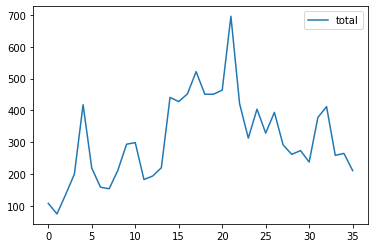

In [22]:
converdate.plot()

In [23]:
converdate.head()

,yearm,total
0,2018-01,108
1,2018-02,75
2,2018-03,136
3,2018-04,200
4,2018-05,418


### Ahora vamos a ver la evolución de temas, pero dentro de las 1000

para eso, primero contamos cuantas conversaciones tenemos por mes

In [24]:
sample_date = full5.copy()
sample_date = sample_date[sample_date.Identifier.isin(taggs.Id)]
sample_date['yearm'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%Y-%m') for x in sample_date.message_created_at]
sample_date = sample_date[sample_date.yearm.astype(str)!='2021-01'] 
converdate_sample = sample_date.groupby(['yearm']).Identifier.nunique().reset_index()
converdate_sample = converdate_sample.rename(columns={'Identifier':'total'})

<AxesSubplot:>

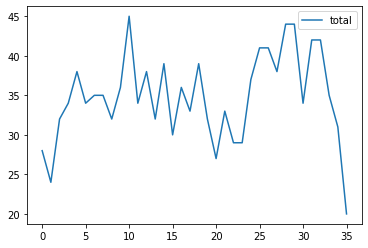

In [25]:
converdate_sample.plot()

In [26]:
converdate_sample.head()

,yearm,total
0,2018-01,28
1,2018-02,24
2,2018-03,32
3,2018-04,34
4,2018-05,38


In [27]:
taggs_date = taggs.merge(sample_date[['yearm','Identifier']].drop_duplicates(), left_on='Id', right_on='Identifier')

In [28]:
taggs_date.shape

(1253, 23)

In [29]:
temas_tiempo_sample = taggs_date.groupby(['yearm']).sum().reset_index().drop(['Id','Identifier'],axis=1)
temas_tiempo_sample = temas_tiempo_sample.merge(converdate_sample, on='yearm')

In [30]:
temas_tiempo_sample.head()

,yearm,Ansiosa,Depresiva,Suicida,Temas_autoimagen,Temas_vinculares,Temas_sentido,Temas_emoción,Temas_violencia,Temas_desempeño,Temas_diversidad,estrategia_validación,estrategia_reflexionar,estrategia_recursos,estrategia_contención,estrategia_indagación,estrategia_educación,estrategia_derivación,total
0,2018-01,7,15,13,10,22,2,12,9,4,9,17,5,13,12,18,7,5,28
1,2018-02,4,9,10,7,15,2,8,4,1,7,10,4,6,6,14,6,4,24
2,2018-03,7,18,15,14,22,7,13,5,4,11,18,11,13,13,20,6,3,32
3,2018-04,10,17,19,16,23,5,13,9,4,8,18,9,16,14,26,4,2,34
4,2018-05,6,10,22,10,32,5,9,9,2,6,16,4,19,18,20,4,2,38


In [31]:
temas_tiempo_sample['autoimagenN'] = temas_tiempo_sample.Temas_autoimagen/temas_tiempo_sample.total
temas_tiempo_sample['violenciaN'] = temas_tiempo_sample.Temas_violencia/temas_tiempo_sample.total
temas_tiempo_sample['diversidadN'] = temas_tiempo_sample.Temas_diversidad/temas_tiempo_sample.total
temas_tiempo_sample['desempeñoN'] = temas_tiempo_sample.Temas_desempeño/temas_tiempo_sample.total
temas_tiempo_sample['sentidoN'] = temas_tiempo_sample.Temas_sentido/temas_tiempo_sample.total
temas_tiempo_sample['vincularesN'] = temas_tiempo_sample.Temas_vinculares/temas_tiempo_sample.total
temas_tiempo_sample['emociónN'] = temas_tiempo_sample.Temas_emoción/temas_tiempo_sample.total

### Aplicando diccionarios semilla para ver la evoluación de familias temáticas en todo el corpus 

In [32]:
short_autoimagen = ['cuerpo', 'autoestima', 'feo','fea', 'inseguro','insegura','odio', 'negativo', 'negativa','asco','arreglarme','agraciada','agraciado','atractivo','atractiva','rechazo','sirvo','sobro','comer','espejo', 'anormal','gorda','gordo','bonito','obesidad','obeso','obesa','autoimagen','corporal'] 
short_violencia = ['violaron','violación','violó','bullying', 'bulling', 'bullyng','abuso', 'abusa','abusó','abusaron', 'violencia', 'maltrato', 'acoso','acosa','acosan','agresión','pegar','pegan','pegaban', 'pegó','golpes','golpea','golpean','golpeaban','gritos','humilla','humillan']    
short_diversidad = ['gay', 'homosexual',  'orientación',  'trans', 'bisexual', 'lesbiana', 'closet',  'género',  'homofóbico', 'homofóbica', 'homofóbicos', 'hetero', 'transgénero', 'binario','hermafrodita','intersexual','fluido','bigénero','agénero','demisexual','pansexual']
short_sentido = ['miedos', 'fingir','rendí','rindo', 'rendirse', 'medioambiente', 'desesperanza', 'ecológico','ecológica' ,  'decepcionado', 'decepcionada','desmotivado' , 'desmotivada','esperanzado','esperanzada','desesperanzado','desesperanzada','motivación','motive' ] 
short_vinculares = [  'amigo', 'amigos', 'amiga', 'amigas', 'sola','padre', 'papá', 'familia','familiar', 'papás','padres', 'pareja','pololo','polola', 'discutir','discutí','discutimos','terminó', 'acabó','amigues', 'amigxs', 'hermanos','mamá', 'madre', 'terminamos',  'tóxica',  'casa']
short_emocion = ['crisis', 'llorar', 'llanto', 'ansiedad',  'pánico', 'pecho',  'angustia', 'respiración', 'respirar', 'sudando','temblor', 'tiembla', 'tiemblan', 'pulso','miedos']
short_desempeño = ['carrera', 'estudio', 'sueldo', 'universidad', 'notas' , 'psu' , 'insuficiente', 'trabajo' , 'trabajar', 'plata' , 'dinero', 'rendimiento', 'insuficientes', 'esfuerzo', 'prueba', 'esforzarme', 'preu' ]


In [33]:
%%time
autoimagen = []
violencia = []
diversidad = []
desempeño = []
sentido = []
vinculares = []
emocion = []
all_id = full5.Identifier.tolist()
all_id = list(set(all_id))
for idd in all_id:
  df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
  texto = []
  for ix in range(df_texto.shape[0]):
    if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace('clo set','closet')
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
  texto = ' '.join(texto)      
  aa = len(list(set(texto.split()) & set(short_autoimagen)) ) 
  vv = len(list(set(texto.split()) & set(short_violencia)) )
  dd = len(list(set(texto.split()) & set(short_diversidad)) )
  de = len(list(set(texto.split()) & set(short_desempeño)) )
  ss = len(list(set(texto.split()) & set(short_sentido)) )
  vn = len(list(set(texto.split()) & set(short_vinculares)) )
  ee = len(list(set(texto.split()) & set(short_emocion)) )
  
  autoimagen.append(aa)
  violencia.append(vv)
  diversidad.append(dd)
  desempeño.append(de)
  sentido.append(ss)
  vinculares.append(vn)
  emocion.append(ee)

Wall time: 40.7 s


In [34]:
auto_textos = pd.DataFrame({'Id': all_id, 'autoimagen': autoimagen, 'violencia':violencia, 'diversidad':diversidad,'desempeño':desempeño,'sentido':sentido,'vinculares':vinculares, 'emocion':emocion })
auto_textos.autoimagen = [1 if x>0 else 0 for x in auto_textos.autoimagen]
auto_textos.violencia = [1 if x>0 else 0 for x in auto_textos.violencia]
auto_textos.diversidad = [1 if x>0 else 0 for x in auto_textos.diversidad]
auto_textos.desempeño = [1 if x>0 else 0 for x in auto_textos.desempeño]
auto_textos.sentido = [1 if x>0 else 0 for x in auto_textos.sentido]
auto_textos.vinculares = [1 if x>0 else 0 for x in auto_textos.vinculares]
auto_textos.emocion = [1 if x>0 else 0 for x in auto_textos.emocion]

Esta es la proporción en las 1000 conversaciones taggeadas

Temas_autoimagen                                                        382  

Temas_vinculares                                                        724

Temas_sentido                                                           149

Temas_emoción                                                           465

Temas_violencia                                                         213

Temas_desempeño                                                         321

Temas_diversidad                                                        165

In [35]:
print('Autoimagen: ' ,round(auto_textos[auto_textos.autoimagen>0].shape[0]/auto_textos.shape[0],2)) # 33
print('Violencia: ' ,round(auto_textos[auto_textos.violencia>0].shape[0]/auto_textos.shape[0],2)) # 15
print('Diversidad: ' ,round(auto_textos[auto_textos.diversidad>0].shape[0]/auto_textos.shape[0],2)) # 16
print('Desempeño: ' ,round(auto_textos[auto_textos.desempeño>0].shape[0]/auto_textos.shape[0],2)) # 32
print('Sentido: ' ,round(auto_textos[auto_textos.sentido>0].shape[0]/auto_textos.shape[0],2)) # 6
print('Vinculares: ' ,round(auto_textos[auto_textos.vinculares>0].shape[0]/auto_textos.shape[0],2 )) # 78
print('Emoción: ' ,round(auto_textos[auto_textos.emocion>0].shape[0]/auto_textos.shape[0],2))  # 35

Autoimagen:  0.33
Violencia:  0.15
Diversidad:  0.16
Desempeño:  0.32
Sentido:  0.06
Vinculares:  0.78
Emoción:  0.35


In [36]:
auto_textos = auto_textos.merge(full5[['yearm','Identifier']].drop_duplicates(), left_on='Id', right_on='Identifier')

In [37]:
auto_textos.head()

,Id,autoimagen,violencia,diversidad,desempeño,sentido,vinculares,emocion,yearm,Identifier
0,589825.0,1,0,1,0,0,1,0,2018-07,589825.0
1,1703949.0,0,0,0,1,0,1,0,2020-01,1703949.0
2,1277966.0,0,0,0,0,0,0,0,2019-06,1277966.0
3,2293776.0,1,0,0,1,0,1,1,2020-06,2293776.0
4,1703962.0,0,0,0,1,0,1,1,2020-01,1703962.0


In [38]:
auto_textos.shape

(11228, 10)

### Para evaluar diccionarios semilla, vamos a comparar con conversaciones taggeadas

In [39]:
taggs.head()

,Id,Ansiosa,Depresiva,Suicida,Temas_autoimagen,Temas_vinculares,Temas_sentido,Temas_emoción,Temas_violencia,Temas_desempeño,Temas_diversidad,estrategia_validación,estrategia_reflexionar,estrategia_recursos,estrategia_contención,estrategia_indagación,estrategia_educación,estrategia_derivación,recursos,gravedad,exito
0,1331246,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,medio,medio,poco
1,1301687,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,bastante,medio,bastante
2,1311242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,medio,medio,medio
3,1362804,1,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,medio,medio,poco
4,1400860,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,medio,medio,bastante


In [40]:
taggs_dic = auto_textos[auto_textos.Id.isin(taggs.Id)]

In [41]:
taggs_dic.shape

(1253, 10)

In [42]:
len(taggs_dic.Id.unique())

1196

### Emoción

In [43]:
emocion = taggs[['Temas_emoción','Id']].merge(taggs_dic[['emocion','Id']])

In [44]:
TP = emocion[(emocion.Temas_emoción==1) & (emocion.emocion==1)].shape[0]
FP = emocion[(emocion.Temas_emoción==0) & (emocion.emocion==1)].shape[0]
TN = emocion[(emocion.Temas_emoción==0) & (emocion.emocion==0)].shape[0]
FN = emocion[(emocion.Temas_emoción==1) & (emocion.emocion==0)].shape[0]
accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.6624102154828412
precision:  0.6108597285067874
recall:  0.5182341650671785


In [45]:
sum((emocion.Temas_emoción - emocion.emocion)==0) 

830

In [46]:
## CASO 1, fueron taggeados como emoción por los taggeadores, pero no por el diccionario
sum((emocion.Temas_emoción - emocion.emocion)>0) 

251

In [47]:
## CASO 2, fue clasificado como emoción por el diccionario pero no por los taggeadores
sum((emocion.Temas_emoción - emocion.emocion)<0)

172

In [48]:
caso1 = emocion[(emocion.Temas_emoción - emocion.emocion)>0].Id.tolist()
caso2 = emocion[(emocion.Temas_emoción - emocion.emocion)<0].Id.tolist() 

In [49]:
#full5[(full5.Identifier==caso1[19]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [50]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))
for word in short_emocion:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_emoción.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no) 

crisis 68 26
llorar 121 64
llanto 15 4
ansiedad 88 63
pánico 40 21
pecho 33 18
angustia 49 51
respiración 7 2
respirar 31 8
sudando 0 0
temblor 0 1
tiembla 2 0
tiemblan 0 0
pulso 16 5
miedos 11 10


### Vinculares

In [51]:
vinculares = taggs[['Temas_vinculares','Id']].merge(taggs_dic[['vinculares','Id']])

In [52]:
TP = vinculares[(vinculares.Temas_vinculares==1) & (vinculares.vinculares==1)].shape[0]
FP = vinculares[(vinculares.Temas_vinculares==0) & (vinculares.vinculares==1)].shape[0]
TN = vinculares[(vinculares.Temas_vinculares==0) & (vinculares.vinculares==0)].shape[0]
FN = vinculares[(vinculares.Temas_vinculares==1) & (vinculares.vinculares==0)].shape[0]

accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.8068635275339185
precision:  0.8284561049445005
recall:  0.9193729003359462


In [53]:
sum((vinculares.Temas_vinculares - vinculares.vinculares)==0) 

1011

In [54]:
## CASO 1,  fueron taggeados como vinculares por los taggeadores, pero no por el diccionario
sum((vinculares.Temas_vinculares - vinculares.vinculares)>0) 

72

In [55]:
## CASO 2, fue clasificado como vincular por el diccionario pero no por los taggeadores
sum((vinculares.Temas_vinculares - vinculares.vinculares)<0)

170

In [56]:
caso1 = vinculares[(vinculares.Temas_vinculares - vinculares.vinculares)>0].Id.tolist()
caso2 = vinculares[(vinculares.Temas_vinculares - vinculares.vinculares)<0].Id.tolist()

In [57]:
#full5[(full5.Identifier==caso1[3]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [58]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))
for word in short_vinculares:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_vinculares.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no) 

amigo 318 46
amigos 274 35
amiga 231 29
amigas 111 10
sola 288 45
padre 190 32
papá 197 22
familia 359 59
familiar 87 12
papás 106 12
padres 146 27
pareja 152 12
pololo 75 10
polola 31 3
discutir 3 0
discutí 9 0
discutimos 10 1
terminó 31 3
acabó 6 1
amigues 3 0
amigxs 15 3
hermanos 44 5
mamá 293 36
madre 118 14
terminamos 37 3
tóxica 20 1
casa 311 51


### Violencia

In [59]:
violencia = taggs[['Temas_violencia','Id']].merge(taggs_dic[['violencia','Id']])

In [60]:
TP = violencia[(violencia.Temas_violencia==1) & (violencia.violencia==1)].shape[0]
FP = violencia[(violencia.Temas_violencia==0) & (violencia.violencia==1)].shape[0]
TN = violencia[(violencia.Temas_violencia==0) & (violencia.violencia==0)].shape[0]
FN = violencia[(violencia.Temas_violencia==1) & (violencia.violencia==0)].shape[0]

accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.8292098962490024
precision:  0.7477876106194691
recall:  0.5184049079754601


In [61]:
sum((violencia.Temas_violencia - violencia.violencia)==0) 

1039

In [62]:
## CASO 1, fueron taggeados como violencia por los taggeadores, pero no por el diccionario  
sum((violencia.Temas_violencia - violencia.violencia)>0)    

157

In [63]:
## CASO 2, fue clasificado como violencia por el diccionario pero no por los taggeadores 
sum((violencia.Temas_violencia - violencia.violencia)<0) 

57

In [64]:
caso1 = violencia[(violencia.Temas_violencia - violencia.violencia)>0].Id.tolist()
caso2 = violencia[(violencia.Temas_violencia - violencia.violencia)<0].Id.tolist()

In [65]:
#full5[(full5.Identifier==caso2[0]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [66]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))
for word in short_violencia:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_violencia.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no) 

violaron 4 0
violación 7 1
violó 5 0
bullying 43 22
bulling 12 1
bullyng 8 3
abuso 39 2
abusa 29 5
abusó 6 0
abusaron 5 0
violencia 22 4
maltrato 13 3
acoso 8 5
acosa 10 2
acosan 1 0
agresión 2 0
pegar 20 10
pegan 5 2
pegaban 3 0
pegó 3 1
golpes 18 3
golpea 35 13
golpean 7 0
golpeaban 5 0
gritos 9 5
humilla 11 5
humillan 2 1


### Diversidad

In [67]:
diversidad = taggs[['Temas_diversidad','Id']].merge(taggs_dic[['diversidad','Id']])

In [68]:
TP = diversidad[(diversidad.Temas_diversidad==1) & (diversidad.diversidad==1)].shape[0]
FP = diversidad[(diversidad.Temas_diversidad==0) & (diversidad.diversidad==1)].shape[0]
TN = diversidad[(diversidad.Temas_diversidad==0) & (diversidad.diversidad==0)].shape[0]
FN = diversidad[(diversidad.Temas_diversidad==1) & (diversidad.diversidad==0)].shape[0]

accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.9034317637669593
precision:  0.8516949152542372
recall:  0.7003484320557491


In [69]:
sum((diversidad.Temas_diversidad - diversidad.diversidad)==0) 

1132

In [70]:
## CASO 1, fueron taggeados como diversidad por los taggeadores, pero no por el diccionario
sum((diversidad.Temas_diversidad - diversidad.diversidad)>0)    

86

In [71]:
## CASO 2, fue clasificado como diversidad por el diccionario pero no por los taggeadores
sum((diversidad.Temas_diversidad - diversidad.diversidad)<0)  

35

In [72]:
caso1 = diversidad[(diversidad.Temas_diversidad - diversidad.diversidad)>0].Id.tolist()
caso2 = diversidad[(diversidad.Temas_diversidad - diversidad.diversidad)<0].Id.tolist()

In [73]:
#full5[(full5.Identifier==caso1[7]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [74]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))
for word in short_diversidad:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_diversidad.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no) 

gay 59 4
homosexual 32 3
orientación 45 10
trans 84 31
bisexual 33 2
lesbiana 34 4
closet 27 1
género 31 6
homofóbico 8 0
homofóbica 6 0
homofóbicos 4 0
hetero 21 4
transgénero 10 0
binario 7 0
hermafrodita 0 0
intersexual 1 0
fluido 8 2
bigénero 0 0
agénero 0 0
demisexual 0 1
pansexual 3 0


### Desempeño

In [75]:
desempeño = taggs[['Temas_desempeño','Id']].merge(taggs_dic[['desempeño','Id']])

In [76]:
TP = desempeño[(desempeño.Temas_desempeño==1) & (desempeño.desempeño==1)].shape[0]
FP = desempeño[(desempeño.Temas_desempeño==0) & (desempeño.desempeño==1)].shape[0]
TN = desempeño[(desempeño.Temas_desempeño==0) & (desempeño.desempeño==0)].shape[0]
FN = desempeño[(desempeño.Temas_desempeño==1) & (desempeño.desempeño==0)].shape[0]

accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.7294493216280926
precision:  0.33585858585858586
recall:  0.6363636363636364


In [77]:
sum((desempeño.Temas_desempeño - desempeño.desempeño)==0) 

914

In [78]:
## CASO 1, fueron taggeados como desempeño por los taggeadores, pero no por el diccionario  
sum((desempeño.Temas_desempeño - desempeño.desempeño)>0)    

76

In [79]:
## CASO 2, fue clasificado como desempeño por el diccionario pero no por los taggeadores  
sum((desempeño.Temas_desempeño - desempeño.desempeño)<0)

263

In [80]:
caso1 = desempeño[(desempeño.Temas_desempeño - desempeño.desempeño)>0].Id.tolist()
caso2 = desempeño[(desempeño.Temas_desempeño - desempeño.desempeño)<0].Id.tolist()

In [81]:
#full5[(full5.Identifier==caso1[0]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [82]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))
for word in short_desempeño:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_desempeño.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no) 

carrera 31 20
estudio 35 58
sueldo 0 3
universidad 39 41
notas 32 11
psu 8 8
insuficiente 4 9
trabajo 44 92
trabajar 26 36
plata 20 36
dinero 23 53
rendimiento 4 4
insuficientes 0 1
esfuerzo 16 21
prueba 21 12
esforzarme 3 0
preu 4 4


### Autoimagen

In [83]:
autoimagen = taggs[['Temas_autoimagen','Id']].merge(taggs_dic[['autoimagen','Id']])

In [84]:
TP = autoimagen[(autoimagen.Temas_autoimagen==1) & (autoimagen.autoimagen==1)].shape[0]
FP = autoimagen[(autoimagen.Temas_autoimagen==0) & (autoimagen.autoimagen==1)].shape[0]
TN = autoimagen[(autoimagen.Temas_autoimagen==0) & (autoimagen.autoimagen==0)].shape[0]
FN = autoimagen[(autoimagen.Temas_autoimagen==1) & (autoimagen.autoimagen==0)].shape[0]

accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.7166799680766162
precision:  0.5747126436781609
recall:  0.5952380952380952


In [85]:
sum((autoimagen.Temas_autoimagen - autoimagen.autoimagen)==0) 

898

In [86]:
## CASO 1, fueron taggeados como desempeño por los taggeadores, pero no por el diccionario  
sum((autoimagen.Temas_autoimagen - autoimagen.autoimagen)>0)    

170

In [87]:
## CASO 2, fue clasificado como desempeño por el diccionario pero no por los taggeadores  
sum((autoimagen.Temas_autoimagen - autoimagen.autoimagen)<0)

185

In [88]:
caso1 = autoimagen[(autoimagen.Temas_autoimagen - autoimagen.autoimagen)>0].Id.tolist()
caso2 = autoimagen[(autoimagen.Temas_autoimagen - autoimagen.autoimagen)<0].Id.tolist()

In [89]:
#full5[(full5.Identifier==caso2[0]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [90]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))
for word in short_autoimagen:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_autoimagen.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no)  

cuerpo 65 48
autoestima 62 19
feo 19 17
fea 33 19
inseguro 4 3
insegura 13 13
odio 78 35
negativo 9 16
negativa 4 8
asco 34 28
arreglarme 1 3
agraciada 0 0
agraciado 0 0
atractivo 2 1
atractiva 0 1
rechazo 18 12
sirvo 22 7
sobro 2 2
comer 46 34
espejo 12 7
anormal 4 3
gorda 29 8
gordo 1 1
bonito 12 10
obesidad 1 0
obeso 1 0
obesa 3 0
autoimagen 0 0
corporal 3 4


### Sentido

In [91]:
sentido = taggs[['Temas_sentido','Id']].merge(taggs_dic[['sentido','Id']])

In [92]:
TP = sentido[(sentido.Temas_sentido==1) & (sentido.sentido==1)].shape[0]
FP = sentido[(sentido.Temas_sentido==0) & (sentido.sentido==1)].shape[0]
TN = sentido[(sentido.Temas_sentido==0) & (sentido.sentido==0)].shape[0]
FN = sentido[(sentido.Temas_sentido==1) & (sentido.sentido==0)].shape[0]

accuracy = (TP+TN) / (TP + FP + TN + FN )
precision = TP / (TP + FP)
recall  = TP / (TP + FN)
print('accuracy: ',accuracy) 
print('precision: ',precision) 
print('recall: ',recall) 

accuracy:  0.8244213886671987
precision:  0.22727272727272727
recall:  0.11627906976744186


In [93]:
sentido[(sentido.Temas_sentido==0) & (sentido.sentido==0)].shape

(1013, 3)

In [94]:
sum((sentido.Temas_sentido - sentido.sentido)==0) 

1033

In [95]:
## CASO 1,  fueron taggeados como sentido por los taggeadores, pero no por el diccionario  
sum((sentido.Temas_sentido - sentido.sentido)>0)    

152

In [96]:
## CASO 2, fue clasificado como sentido por el diccionario pero no por los taggeadores
sum((sentido.Temas_sentido - sentido.sentido)<0)  

68

In [97]:
caso1 = sentido[(sentido.Temas_sentido - sentido.sentido)>0].Id.tolist()
caso2 = sentido[(sentido.Temas_sentido - sentido.sentido)<0].Id.tolist()

In [98]:
#full5[(full5.Identifier==caso1[20]) & (full5.person_type=='Client')].reset_index(drop=True).style.set_properties(subset=['content2'], **{'width': '600px'})

In [99]:
all_id = taggs.Id.tolist()
all_id = list(set(all_id))

for word in short_sentido:
  count=0
  count_no=0
  for idd in all_id:
    df_texto = full5[full5.Identifier==idd].reset_index(drop=True)
    texto = []
    for ix in range(df_texto.shape[0]):
      if df_texto.person_type[ix]=='Client':
        mytext = df_texto.content[ix]
        if isinstance(mytext,str):
          mytext = mytext.lower()
          mytext = mytext.replace(',',' , ')
          mytext = mytext.replace('.',' . ')
          mytext = mytext.replace('(',' ( ')
          mytext = mytext.replace(')',' ) ')
          mytext = re.sub('\W+',' ', mytext)
          texto.append(mytext)
    texto = ' '.join(texto)  
    tema = taggs[taggs.Id==idd].Temas_sentido.tolist()[0]
    if (word in texto) and (tema==1):
       count +=1
    if (word in texto) and (tema==0):
       count_no +=1
  print(word,count,count_no)      

miedos 3 18
fingir 3 15
rendí 2 10
rindo 4 1
rendirse 0 1
medioambiente 0 0
desesperanza 1 3
ecológico 0 0
ecológica 0 0
decepcionado 1 7
decepcionada 1 7
desmotivado 2 4
desmotivada 0 1
esperanzado 0 1
esperanzada 0 1
desesperanzado 0 1
desesperanzada 0 1
motivación 4 16
motive 3 1


#### Graficando los resultados

In [100]:
temas_tiempo = auto_textos.groupby(['yearm']).sum().reset_index().drop(['Id','Identifier'],axis=1)
temas_tiempo = temas_tiempo.merge(converdate, on='yearm')

In [101]:
temas_tiempo['autoimagenN'] = temas_tiempo.autoimagen/temas_tiempo.total
temas_tiempo['violenciaN'] = temas_tiempo.violencia/temas_tiempo.total
temas_tiempo['diversidadN'] = temas_tiempo.diversidad/temas_tiempo.total
temas_tiempo['desempeñoN'] = temas_tiempo.desempeño/temas_tiempo.total
temas_tiempo['sentidoN'] = temas_tiempo.sentido/temas_tiempo.total
temas_tiempo['vincularesN'] = temas_tiempo.vinculares/temas_tiempo.total

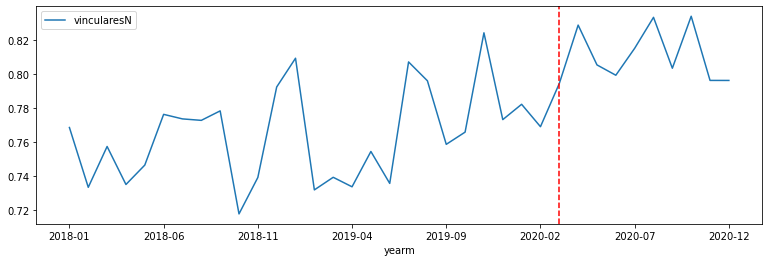

In [102]:
ax = temas_tiempo.plot(x='yearm',y='vincularesN',figsize=(13,4))
ax.axvline(26, color="red", linestyle="--")
plt.savefig("vinculares.svg")

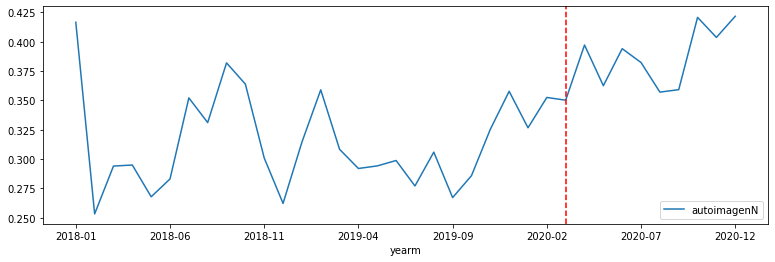

In [103]:
ax = temas_tiempo.plot(x='yearm',y='autoimagenN',figsize=(13,4))
ax.axvline(26, color="red", linestyle="--")
plt.savefig("autoimagen.svg")

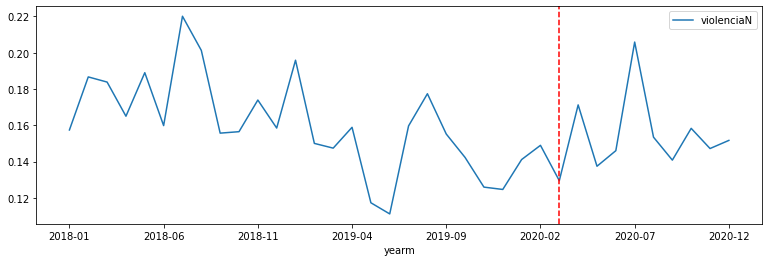

In [104]:
ax = temas_tiempo.plot(x='yearm',y='violenciaN',figsize=(13,4))
ax.axvline(26, color="red", linestyle="--")
plt.savefig("violencia.svg")

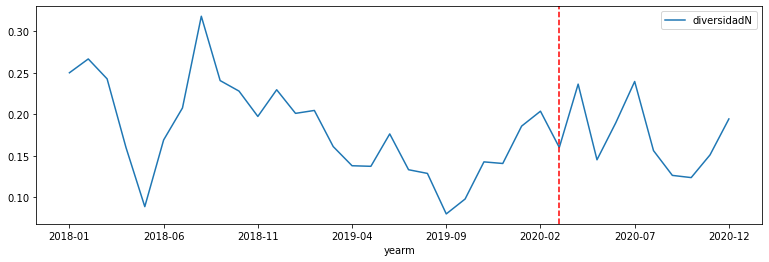

In [105]:
ax = temas_tiempo.plot(x='yearm',y='diversidadN',figsize=(13,4))
ax.axvline(26, color="red", linestyle="--")

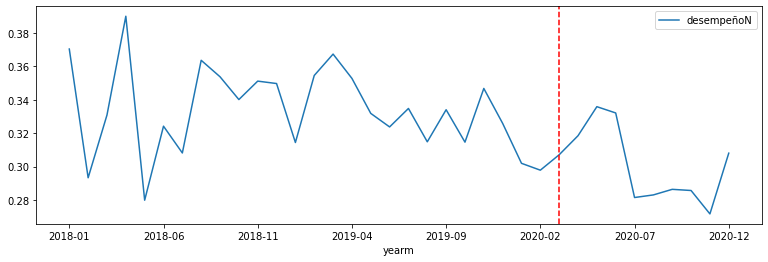

In [106]:
ax = temas_tiempo.plot(x='yearm',y='desempeñoN',figsize=(13,4))
ax.axvline(26, color="red", linestyle="--")
plt.savefig("desempeño.svg")

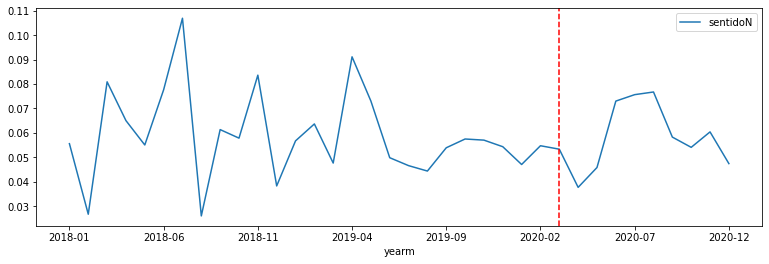

In [107]:
ax = temas_tiempo.plot(x='yearm',y='sentidoN',figsize=(13,4))
ax.axvline(26, color="red", linestyle="--")

In [108]:
temas_tiempo.to_csv('temas_tiempo.csv',sep='\t',encoding='UTF-8')

In [109]:
temas_tiempo_sample.to_csv('temas_tiempo_sample.csv',sep='\t',encoding='UTF-8')

### ¿Qé formas de intervención están asociadas a qué sintomatologías?

In [110]:
taggs.head()

,Id,Ansiosa,Depresiva,Suicida,Temas_autoimagen,Temas_vinculares,Temas_sentido,Temas_emoción,Temas_violencia,Temas_desempeño,Temas_diversidad,estrategia_validación,estrategia_reflexionar,estrategia_recursos,estrategia_contención,estrategia_indagación,estrategia_educación,estrategia_derivación,recursos,gravedad,exito
0,1331246,1,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,medio,medio,poco
1,1301687,1,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,bastante,medio,bastante
2,1311242,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,medio,medio,medio
3,1362804,1,1,0,1,1,0,1,0,1,0,0,0,1,1,1,0,0,medio,medio,poco
4,1400860,0,1,1,0,1,0,0,0,0,0,0,1,1,1,1,0,0,medio,medio,bastante


In [112]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf
from statsmodels.tools.tools import add_constant

In [13]:
taggs["estrategia_validación"] = taggs["estrategia_validación"].astype("category")
taggs["estrategia_reflexionar"] = taggs["estrategia_reflexionar"].astype("category")
taggs["estrategia_recursos"] = taggs["estrategia_recursos"].astype("category")
taggs["estrategia_contención"] = taggs["estrategia_contención"].astype("category")
taggs["estrategia_indagación"] = taggs["estrategia_indagación"].astype("category")
taggs["estrategia_educación"] = taggs["estrategia_educación"].astype("category")
taggs["estrategia_derivación"] = taggs["estrategia_derivación"].astype("category")
taggs["Temas_autoimagen"] = taggs["Temas_autoimagen"].astype("category")
taggs["Temas_vinculares"] = taggs["Temas_vinculares"].astype("category")
taggs["Temas_sentido"] = taggs["Temas_sentido"].astype("category")
taggs["Temas_emoción"] = taggs["Temas_emoción"].astype("category")
taggs["Temas_violencia"] = taggs["Temas_violencia"].astype("category")
taggs["Temas_desempeño"] = taggs["Temas_desempeño"].astype("category")
taggs["Temas_diversidad"] = taggs["Temas_diversidad"].astype("category")


feature_cols = ['Temas_autoimagen','Temas_vinculares','Temas_emoción','Temas_violencia','Temas_desempeño','Temas_diversidad','estrategia_validación', 'estrategia_reflexionar', 'estrategia_recursos', 'estrategia_contención','estrategia_indagación','estrategia_educación','estrategia_derivación']
#feature_cols = ['Temas_autoimagen','Temas_vinculares','Temas_sentido','Temas_violencia','Temas_desempeño','Temas_diversidad','estrategia_validación', 'estrategia_reflexionar', 'estrategia_recursos', 'estrategia_contención','estrategia_indagación','estrategia_educación','estrategia_derivación']
X = taggs[feature_cols] # Features
#X = pd.get_dummies(X, columns=['Temas_autoimagen','Temas_vinculares','Temas_sentido','Temas_violencia','Temas_desempeño','Temas_diversidad','estrategia_validación', 'estrategia_reflexionar', 'estrategia_recursos','estrategia_contención','estrategia_indagación','estrategia_educación','estrategia_derivación'], drop_first = True)
X = pd.get_dummies(X, columns=['Temas_autoimagen','Temas_vinculares','Temas_emoción','Temas_violencia','Temas_desempeño','Temas_diversidad','estrategia_validación', 'estrategia_reflexionar', 'estrategia_recursos','estrategia_contención','estrategia_indagación','estrategia_educación','estrategia_derivación'], drop_first = True)

X = add_constant(X)

C:\Users\Alumno05\Anaconda3\envs\cabildos\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [14]:
y_suicida = taggs.Suicida
res1 = smf.logit(formula='y_suicida ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_educación_1 + estrategia_derivación_1', data=X).fit()

# sin validación ni educación
res2 = smf.logit(formula='y_suicida ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_derivación_1', data=X).fit()

# sin recursos ni educación
res3 = smf.logit(formula='y_suicida ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_contención_1 +  estrategia_indagación_1 + estrategia_derivación_1', data=X).fit()


# sin recursos ni reflexionar
res4 = smf.logit(formula='y_suicida ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_contención_1 +  estrategia_indagación_1 + estrategia_educación_1  + estrategia_derivación_1', data=X).fit()


Optimization terminated successfully.
         Current function value: 0.606465
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.607593
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.612940
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.612226
         Iterations 5


In [17]:
stargazer = Stargazer([res1,res2,res3,res4])

In [18]:
stargazer
#print(stargazer.render_latex())

Temas : emoción, autoimagen <br>
Estrategias: contención, recursos

In [186]:
logit_model=sm.Logit(y_suicida,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.606465
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Suicida   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                 0.08938
Time:                        15:36:49   Log-Likelihood:                -606.47
converged:                       True   LL-Null:                       -665.99
                                        LLR p-value:                 3.106e-19
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -0.6931      0.203     -3.421      0.001      -1.090

In [26]:
y_depre = taggs.Depresiva
logit_model=sm.Logit(y_depre,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.593045
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:              Depresiva   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                  0.1441
Time:                        13:24:05   Log-Likelihood:                -593.04
converged:                       True   LL-Null:                       -692.91
                                        LLR p-value:                 1.559e-35
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.3542      0.214     -6.329      0.000      -1.774

In [188]:
res1 = smf.logit(formula='y_depre ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_educación_1 + estrategia_derivación_1', data=X).fit()

# sin validación ni educación
res2 = smf.logit(formula='y_depre ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_derivación_1', data=X).fit()

# sin recursos ni educación
res3 = smf.logit(formula='y_depre ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_contención_1 +  estrategia_indagación_1 + estrategia_derivación_1', data=X).fit()


# sin recursos ni reflexionar
res4 = smf.logit(formula='y_depre ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_contención_1 +  estrategia_indagación_1 + estrategia_educación_1  + estrategia_derivación_1', data=X).fit()


Optimization terminated successfully.
         Current function value: 0.593045
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.599435
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.608736
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.616822
         Iterations 5


In [195]:
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                y_depre   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      989
Method:                           MLE   Df Model:                           10
Date:                Sun, 12 Dec 2021   Pseudo R-squ.:                  0.1098
Time:                        15:47:37   Log-Likelihood:                -616.82
converged:                       True   LL-Null:                       -692.91
                                        LLR p-value:                 1.335e-27
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -1.1598      0.204     -5.678      0.000      -1.560      -0.759
Temas_autoimagen_1          0.5758      0.149      3.852      0.000       0.283       0.869
Temas_vinculares_1          0.2716      0.165      1.645      0.100      -0.052       0.595
Temas_emoción_1             0.9051      0.145      6.223      0.000       0.620       1.190
Temas_violencia_1           0.4406      0.175      2.524      0.012       0.099       0.783
Temas_desempeño_1           0.5266      0.155      3.398      0.001       0.223       0.830
Temas_diversidad_1         -0.4235      0.193     -2.193      0.028      -0.802      -0.045
estrategia_contención_1     0.5139      0.167      3.084      0.002       0.187       0.841
estrategia_indagación_1    -0.4698      0.207     -2.274      0.023      -0.875      -0.065
estrategia_educación_1      0.0733      0.169      0.432      0.665      -0.259       0.405
estrategia_derivación_1     0.3831      0.165      2.325      0.020       0.060       0.706
===========================================================================================
"""

In [189]:
stargazer = Stargazer([res1,res2,res3,res4])

In [191]:
#stargazer
print(stargazer.render_latex())

\begin{table}[!htbp] \centering
\begin{tabular}{@{\extracolsep{5pt}}lcccc}
\\[-1.8ex]\hline
\hline \\[-1.8ex]
& \multicolumn{4}{c}{\textit{Dependent variable:}} \
\cr \cline{4-5}
\\[-1.8ex] & (1) & (2) & (3) & (4) \\
\hline \\[-1.8ex]
 Intercept & -1.354$^{***}$ & -1.205$^{***}$ & -1.319$^{***}$ & -1.160$^{***}$ \\
  & (0.214) & (0.207) & (0.210) & (0.204) \\
 Temas_autoimagen_1 & 0.481$^{***}$ & 0.505$^{***}$ & 0.544$^{***}$ & 0.576$^{***}$ \\
  & (0.154) & (0.152) & (0.150) & (0.149) \\
 Temas_desempeño_1 & 0.504$^{***}$ & 0.506$^{***}$ & 0.526$^{***}$ & 0.527$^{***}$ \\
  & (0.159) & (0.158) & (0.156) & (0.155) \\
 Temas_diversidad_1 & -0.492$^{**}$ & -0.434$^{**}$ & -0.494$^{**}$ & -0.424$^{**}$ \\
  & (0.198) & (0.197) & (0.195) & (0.193) \\
 Temas_emoción_1 & 0.802$^{***}$ & 0.820$^{***}$ & 0.876$^{***}$ & 0.905$^{***}$ \\
  & (0.150) & (0.147) & (0.145) & (0.145) \\
 Temas_vinculares_1 & 0.140$^{}$ & 0.189$^{}$ & 0.214$^{}$ & 0.272$^{*}$ \\
  & (0.171) & (0.170) & (0.167) & (0.1

Temas : emoción, desempeño,  autoimagen, violencia <br>
Estrategias : recursos, validación

In [19]:
y_ansiosa = taggs.Ansiosa
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

NameError: name 'y' is not defined

In [47]:

res1 = smf.logit(formula='y_ansiosa ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_educación_1 + estrategia_derivación_1', data=X).fit()

# sin  educación
res2 = smf.logit(formula='y_ansiosa ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_derivación_1', data=X).fit()

# sin recursos ni educación
res3 = smf.logit(formula='y_ansiosa ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_contención_1 +  estrategia_indagación_1 + estrategia_derivación_1', data=X).fit()

# sin recursos ni reflexionar
res4 = smf.logit(formula='y_ansiosa ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1+  estrategia_contención_1 +  estrategia_indagación_1 + estrategia_recursos_1 + estrategia_educación_1  + estrategia_derivación_1', data=X).fit()

#res1.summary()

Optimization terminated successfully.
         Current function value: 0.530345
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531898
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.534149
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.531373
         Iterations 6


In [48]:
#res4.summary()

In [49]:
stargazer = Stargazer([res1,res2,res3,res4])

In [50]:
stargazer
#print(stargazer.render_latex())

In [27]:
res_suicida = smf.logit(formula='y_suicida ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_educación_1 + estrategia_derivación_1', data=X).fit()
res_depre = smf.logit(formula='y_depre ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_educación_1 + estrategia_derivación_1', data=X).fit()
res_ansiosa = smf.logit(formula='y_ansiosa ~  Temas_autoimagen_1 + Temas_vinculares_1 + Temas_emoción_1 + Temas_violencia_1 + Temas_desempeño_1 + Temas_diversidad_1 + estrategia_validación_1 + estrategia_reflexionar_1 + estrategia_recursos_1 + estrategia_contención_1 + estrategia_indagación_1 + estrategia_educación_1 + estrategia_derivación_1', data=X).fit()
stargazer = Stargazer([res_suicida,res_depre,res_ansiosa])

Optimization terminated successfully.
         Current function value: 0.606465
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.593045
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.530345
         Iterations 6


In [37]:
res_suicida.summary()
#res_depre.summary()
#res_ansiosa.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              y_suicida   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      986
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 Dec 2021   Pseudo R-squ.:                 0.08938
Time:                        13:42:11   Log-Likelihood:                -606.47
converged:                       True   LL-Null:                       -665.99
                                        LLR p-value:                 3.106e-19
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -0.6931      0.203     -3.421      0.001      -1.090      -0.296
Temas_autoimagen_1           0.4049      0.153      2.642      0.008       0.105       0.705
Temas_vinculares_1          -0.3504      0.170     -2.060      0.039      -0.684      -0.017
Temas_emoción_1              0.5990      0.148      4.040      0.000       0.308       0.890
Temas_violencia_1            0.3353      0.172      1.946      0.052      -0.002       0.673
Temas_desempeño_1           -0.2585      0.159     -1.631      0.103      -0.569       0.052
Temas_diversidad_1          -0.5537      0.202     -2.737      0.006      -0.950      -0.157
estrategia_validación_1      0.0997      0.166      0.600      0.548      -0.226       0.425
estrategia_reflexionar_1     0.0504      0.170      0.296      0.767      -0.283       0.384
estrategia_recursos_1        0.5031      0.156      3.232      0.001       0.198       0.808
estrategia_contención_1      0.5292      0.185      2.856      0.004       0.166       0.892
estrategia_indagación_1     -0.9079      0.209     -4.343      0.000      -1.318      -0.498
estrategia_educación_1       0.2311      0.179      1.292      0.196      -0.119       0.581
estrategia_derivación_1      0.2899      0.163      1.777      0.076      -0.030       0.610
============================================================================================
"""

In [38]:
stargazer
#print(stargazer.render_latex())

Tema: emoción  <br>
Estrategia : validación, recursos (educación)

#### Checando correlaciones

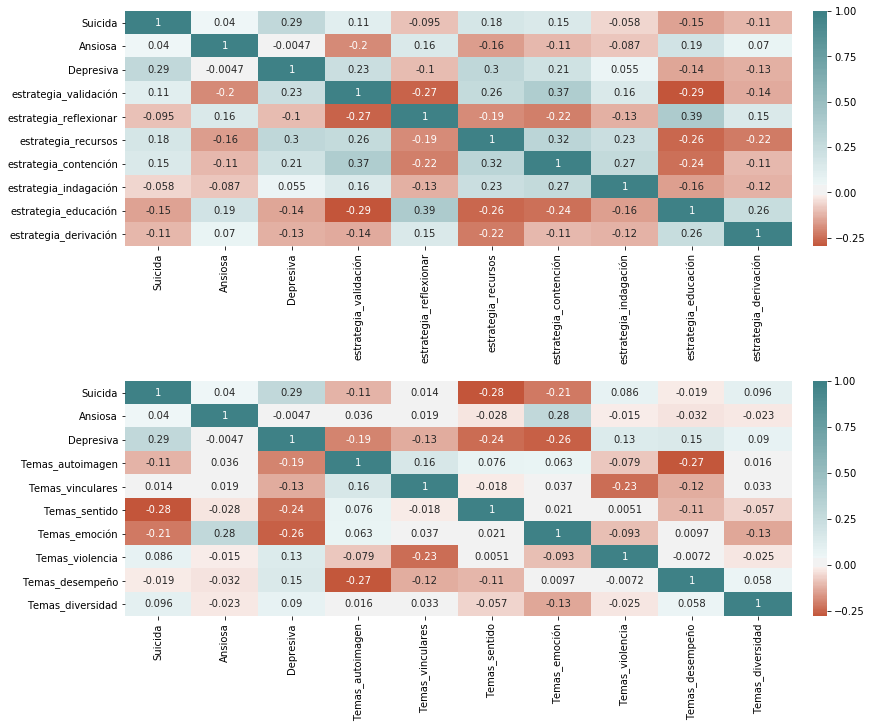

In [135]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12,10),constrained_layout=True)


from matplotlib.colors import DivergingNorm
offset = DivergingNorm(vmin=-0.25, vcenter=0, vmax=1)

heat_estrategia = taggs[['Suicida', 'Ansiosa','Depresiva', 'estrategia_validación', 'estrategia_reflexionar', 'estrategia_recursos', 'estrategia_contención','estrategia_indagación','estrategia_educación','estrategia_derivación']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
heat_tema = taggs[['Suicida', 'Ansiosa','Depresiva', 'Temas_autoimagen','Temas_vinculares','Temas_sentido','Temas_emoción','Temas_violencia','Temas_desempeño','Temas_diversidad']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
#sns.heatmap(heat, annot=True)

sns.heatmap(heat_estrategia, cmap=sns.diverging_palette(20, 200, n=200), norm=offset ,  ax=ax1, annot=True)
sns.heatmap(heat_tema, cmap=sns.diverging_palette(20, 200, n=200), norm=offset ,ax=ax2, annot=True)

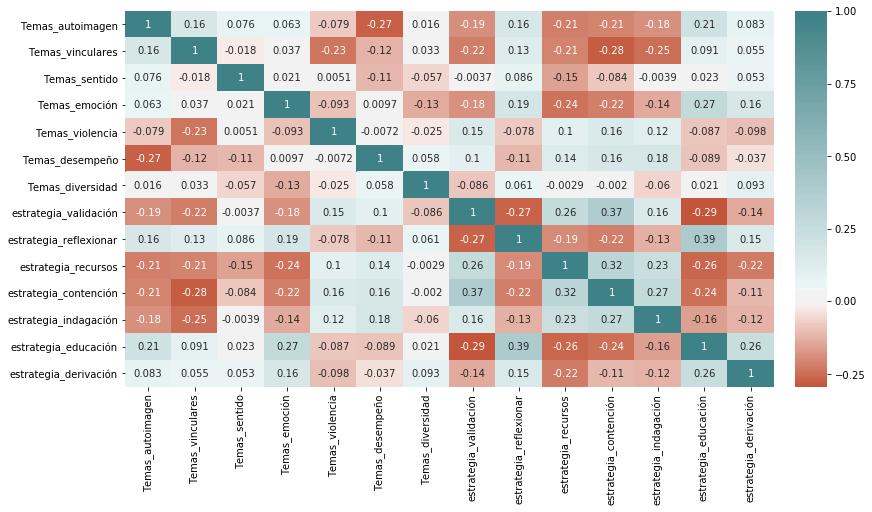

In [136]:
fig = plt.subplots(figsize=(12,7),constrained_layout=True)

#offset = DivergingNorm(vmin=-0.25, vcenter=0, vmax=1)

heat_estrategia_tema = taggs[[ 'Temas_autoimagen','Temas_vinculares','Temas_sentido','Temas_emoción','Temas_violencia','Temas_desempeño','Temas_diversidad', 'estrategia_validación', 'estrategia_reflexionar', 'estrategia_recursos', 'estrategia_contención','estrategia_indagación','estrategia_educación','estrategia_derivación']].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

sns.heatmap(heat_estrategia_tema, cmap=sns.diverging_palette(20, 200, n=200), norm=offset ,   annot=True)

#### Verificando si hay asociación estadística entre sintomatologías

In [9]:
d = taggs[(taggs.Suicida==0) & (taggs.Depresiva==0)].shape[0]    # arriba a la izquierda  : d
c = taggs[(taggs.Suicida==1) & (taggs.Depresiva==0)].shape[0]   # abajo a la izquierda   : c ó b
b = taggs[(taggs.Suicida==0) & (taggs.Depresiva==1)].shape[0]   # arriba a la derecha    : b ó c
a = taggs[(taggs.Suicida==1) & (taggs.Depresiva==1)].shape[0]    # abajo a la derecha     : a
N = a + b + c + d 
phi = (a*d - c*b) / math.sqrt((a+b)*(c+d)*(a+c)*(b+d))
chi2 = N*phi*phi  
chi2

83.43138078830154

In [12]:
d = taggs[(taggs.Ansiosa==0) & (taggs.Depresiva==0)].shape[0]    # arriba a la izquierda  : d
c = taggs[(taggs.Ansiosa==1) & (taggs.Depresiva==0)].shape[0]   # abajo a la izquierda   : c ó b
b = taggs[(taggs.Ansiosa==0) & (taggs.Depresiva==1)].shape[0]   # arriba a la derecha    : b ó c
a = taggs[(taggs.Ansiosa==1) & (taggs.Depresiva==1)].shape[0]    # abajo a la derecha     : a
N = a + b + c + d 
phi = (a*d - c*b) / math.sqrt((a+b)*(c+d)*(a+c)*(b+d))
chi2 = N*phi*phi  
phi

0.004724216491397908

In [13]:
d = taggs[(taggs.Ansiosa==0) & (taggs.Suicida==0)].shape[0]    # arriba a la izquierda  : d
c = taggs[(taggs.Ansiosa==1) & (taggs.Suicida==0)].shape[0]   # abajo a la izquierda   : c ó b
b = taggs[(taggs.Ansiosa==0) & (taggs.Suicida==1)].shape[0]   # arriba a la derecha    : b ó c
a = taggs[(taggs.Ansiosa==1) & (taggs.Suicida==1)].shape[0]    # abajo a la derecha     : a
N = a + b + c + d 
phi = (a*d - c*b) / math.sqrt((a+b)*(c+d)*(a+c)*(b+d))
chi2 = N*phi*phi  
phi

-0.04016616278015657

## Cargando Feature Importance

esto sale del random forest, eso no está en este código

In [28]:
depre = pd.read_csv('clasificadores/importance_Depresiva_corr.csv',encoding='latin-1')
ansio = pd.read_csv('clasificadores/importance_Ansiosa_corr.csv',encoding='latin-1')
suici = pd.read_csv('clasificadores/importance_Suicida_corr.csv',encoding='latin-1')

In [33]:
dep20 = depre[0:20]
sui20 = suici[0:20]
ans20 = ansio[0:20]


In [35]:
dep20['cols'] = dep20['cols'].replace({'depresión':'depression',  'Tristeza':'LIWC - Sadness',  'sentir':'(to) feel',  'Emoneg':'NegEmo',  'solo':'alone',  'Yo':'LIWC - I',  'client_lenght':'Text length',  'nadar':'nothing',  'Prepo':'LIWC - Preposition',  'tener':'(to) have',  'Tiempo':'LIWC - Time',  'Negación':'LIWC - Negation', 'ser':'(to) be',  'Sentidos':'LIWC - Senses',  'Muerte':'LIWC - Death',  'Pronom':'LIWC - Pronouns',  'unomismo':'LIWC - I+We',  'user_response_avg':'Volunteer response avg.',  'triste':'sad',  'comer':'(to) eat'})
sui20['cols'] = sui20['cols'].replace({'Muerte':'LIWC - Death', 'suicidar':'(to) suicide', 'cortar':'(to) cut', 'suicidio':'suicide', 'morir':'(to) die', 'Tristeza':'LIWC - Sadness', 'Metafo':'LIWC - Metaphysical', 'querer':'(to) want', 'user_response_avg':'Volunteer response avg.', 'client_lenght_avg':'User lenght', 'vida':'life', 'Enojo':'LIWC - Anger', 'pastilla':'pill', 'querer morir':'want (to) die', 'dañar':'(to) harm', 'familia':'family', 'rate_user_client':'User/Volunteer length', 'ser':'(to) be', 'client_response_avg':'User response avg.', 'hacer':'(to) do'})
ans20['cols'] = ans20['cols'].replace({'ansiedad':'anxiety', 'Ansiedad':'LIWC - Anxiety', 'pánico':'panic', 'ansioso':'anxious', 'dar':'to (give)', 'crisis':'crisis', 'pechar':'chest', 'ser':'(to) be', 'miedo':'fear', 'Físico':'LIWC - Physical', 'user_response_avg':'Volunteer response avg.', 'crisis pánico':'panic attack', 'cuerpo':'body', 'Emoneg':'NegEmo', 'vez':'time', 'estresante':'stressful', 'querer':'(to) want', 'MecCog':'CogMech', 'client_lenght_avg':'User lenght', 'angustiar':'(to) distress'})

C:\Users\Alumno05\Anaconda3\envs\cabildos\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Alumno05\Anaconda3\envs\cabildos\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Alumno05\Anaconda3\envs\cabildos\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [38]:
ans20

,cols,value
0,anxiety,0.081988
1,LIWC - Anxiety,0.040577
2,panic,0.022394
3,anxious,0.016653
4,to (give),0.015657
5,crisis,0.015255
6,chest,0.013490
7,(to) be,0.012594
8,fear,0.012502
9,LIWC - Physical,0.011864


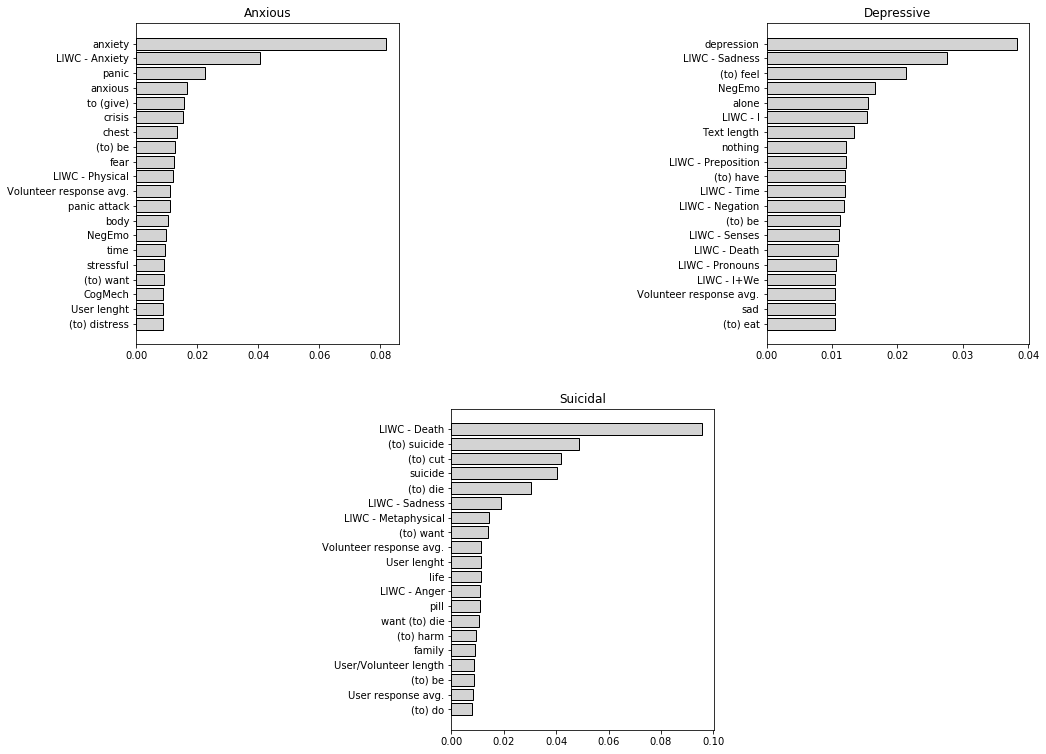

In [56]:
plt.figure(figsize=(16,13)) 

plt.subplot(231)
plt.barh(ans20.cols, ans20.value, color='lightgrey', edgecolor='black')
plt.title('Anxious')
plt.gca().invert_yaxis()

plt.subplot(233)
plt.barh(dep20.cols, dep20.value, color='lightgrey', edgecolor='black')
plt.title('Depressive')
plt.gca().invert_yaxis()

plt.subplot(235)
plt.barh(sui20.cols, sui20.value, color='lightgrey', edgecolor='black')
plt.title('Suicidal')
plt.gca().invert_yaxis()

#plt.show()
plt.savefig("features.svg")